In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.stats import spearmanr

In [5]:
# Replace with your actual file path
gpkg_file = r"C:\Users\as2023\bwSyncShare\01_Analysis\03_Backward_Hydrology\00_Data\catchments_nse.gpkg"

# Load the GeoPackage
gdf = gpd.read_file(gpkg_file)

In [6]:
gdf.head()

gauge_id        basin_id  NSE_without_disch  NSE_disch  \
0  camelsgb_10002  camelsgb_10002              0.301      0.585   
1  camelsgb_10003  camelsgb_10003              0.318      0.599   
2   camelsgb_1001   camelsgb_1001              0.334      0.605   
3  camelsgb_11001  camelsgb_11001              0.333      0.603   
4  camelsgb_11003  camelsgb_11003              0.307      0.574   

   NSE_difference                                           geometry  
0            0.28  MULTIPOLYGON (((-1.83259 57.52677, -1.83343 57...  
1            0.28  MULTIPOLYGON (((-2.08934 57.36359, -2.08933 57...  
2            0.27  MULTIPOLYGON (((-3.26666 58.47607, -3.26665 58...  
3            0.27  MULTIPOLYGON (((-2.18750 57.21841, -2.18750 57...  
4            0.27  MULTIPOLYGON (((-2.71701 57.24233, -2.71700 57...

In [7]:
catchment = 'GRDC_6337505' # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\Caravan\Caravan\timeseries\csv\grdc\{catchment}.csv"
streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)

In [11]:
streamflow_df.columns

Index(['snow_depth_water_equivalent_mean', 'surface_net_solar_radiation_mean',
       'surface_net_thermal_radiation_mean', 'surface_pressure_mean',
       'temperature_2m_mean', 'dewpoint_temperature_2m_mean',
       'u_component_of_wind_10m_mean', 'v_component_of_wind_10m_mean',
       'volumetric_soil_water_layer_1_mean',
       'volumetric_soil_water_layer_2_mean',
       'volumetric_soil_water_layer_3_mean',
       'volumetric_soil_water_layer_4_mean', 'snow_depth_water_equivalent_min',
       'surface_net_solar_radiation_min', 'surface_net_thermal_radiation_min',
       'surface_pressure_min', 'temperature_2m_min',
       'dewpoint_temperature_2m_min', 'u_component_of_wind_10m_min',
       'v_component_of_wind_10m_min', 'volumetric_soil_water_layer_1_min',
       'volumetric_soil_water_layer_2_min',
       'volumetric_soil_water_layer_3_min',
       'volumetric_soil_water_layer_4_min', 'snow_depth_water_equivalent_max',
       'surface_net_solar_radiation_max', 'surface_net_therm

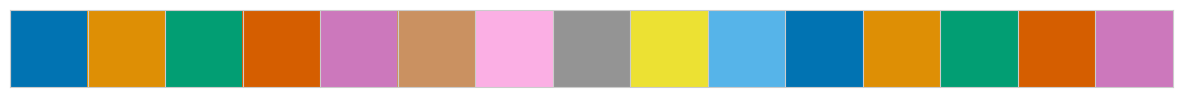

In [15]:
sns.set_style("whitegrid")

# set colors
current_palette = sns.color_palette("colorblind", 15)
sns.palplot(current_palette)


Text(0.5, 0, 'Time (days)')

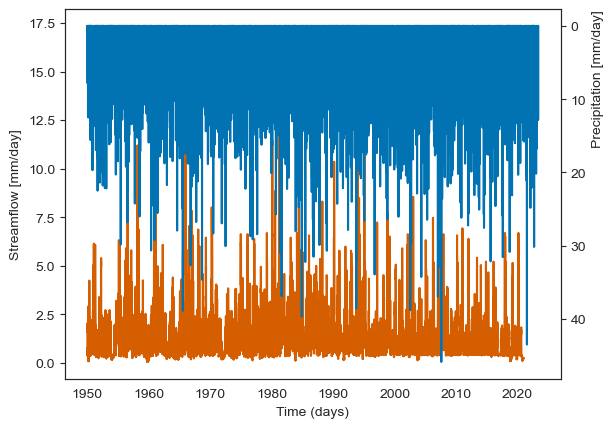

In [18]:
sns.set_style("white")
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

sns.lineplot(x = streamflow_df.index, y= streamflow_df.loc[:,'total_precipitation_sum'], 
             data = streamflow_df, color=current_palette[0], ax=ax2)
ax2.set_ylabel("Precipitation [mm/day]", loc='top')
ax2.invert_yaxis()

ax1.plot(streamflow_df.index,streamflow_df.loc[:,'streamflow'],  color=current_palette[3], label='Observed')
ax1.set_ylabel("Streamflow [mm/day]")
ax1.set_xlabel("Time (days)")

In [10]:
sns.set_style("whitegrid")

# set colors
current_palette = sns.color_palette("colorblind", 15)
sns.palplot(current_palette)

sns.set_style("white")
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

sns.lineplot(x = streamflow_df.index, y= streamflow_df.loc[:,'total_precipitation_sum'], 
             data = streamflow_df, color=current_palette[0], ax=ax2)


ax2.fill_between(uncertainity_simulation.loc[:,'time']/3600, 0, uncertainity_simulation.loc[:,'precip'], color=current_palette[0], alpha = 0.5)        
ax2.set_ylabel("Precipitation [mm/day]", loc='top')
ax2.invert_yaxis()

ax1.plot((reservoir_obs.loc[:,'Time Elapsed']-3600)/3600,reservoir_obs.loc[:,'Inflow'],  color=current_palette[2], label='Observed')
ax1.set_ylabel("Streamflow [$m^3$/s]")
ax1.set_xlabel("Time (days)")
ax1.legend(loc="center right")

KeyError: 'streamflow'